In [79]:
%matplotlib inline
from utils import utils
import canny_edge_detector as ced
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from myfuncs import funcs

In [3]:
dir_name = "Images/Inputs/Set1"
imgs = utils.load_data(dir_name)

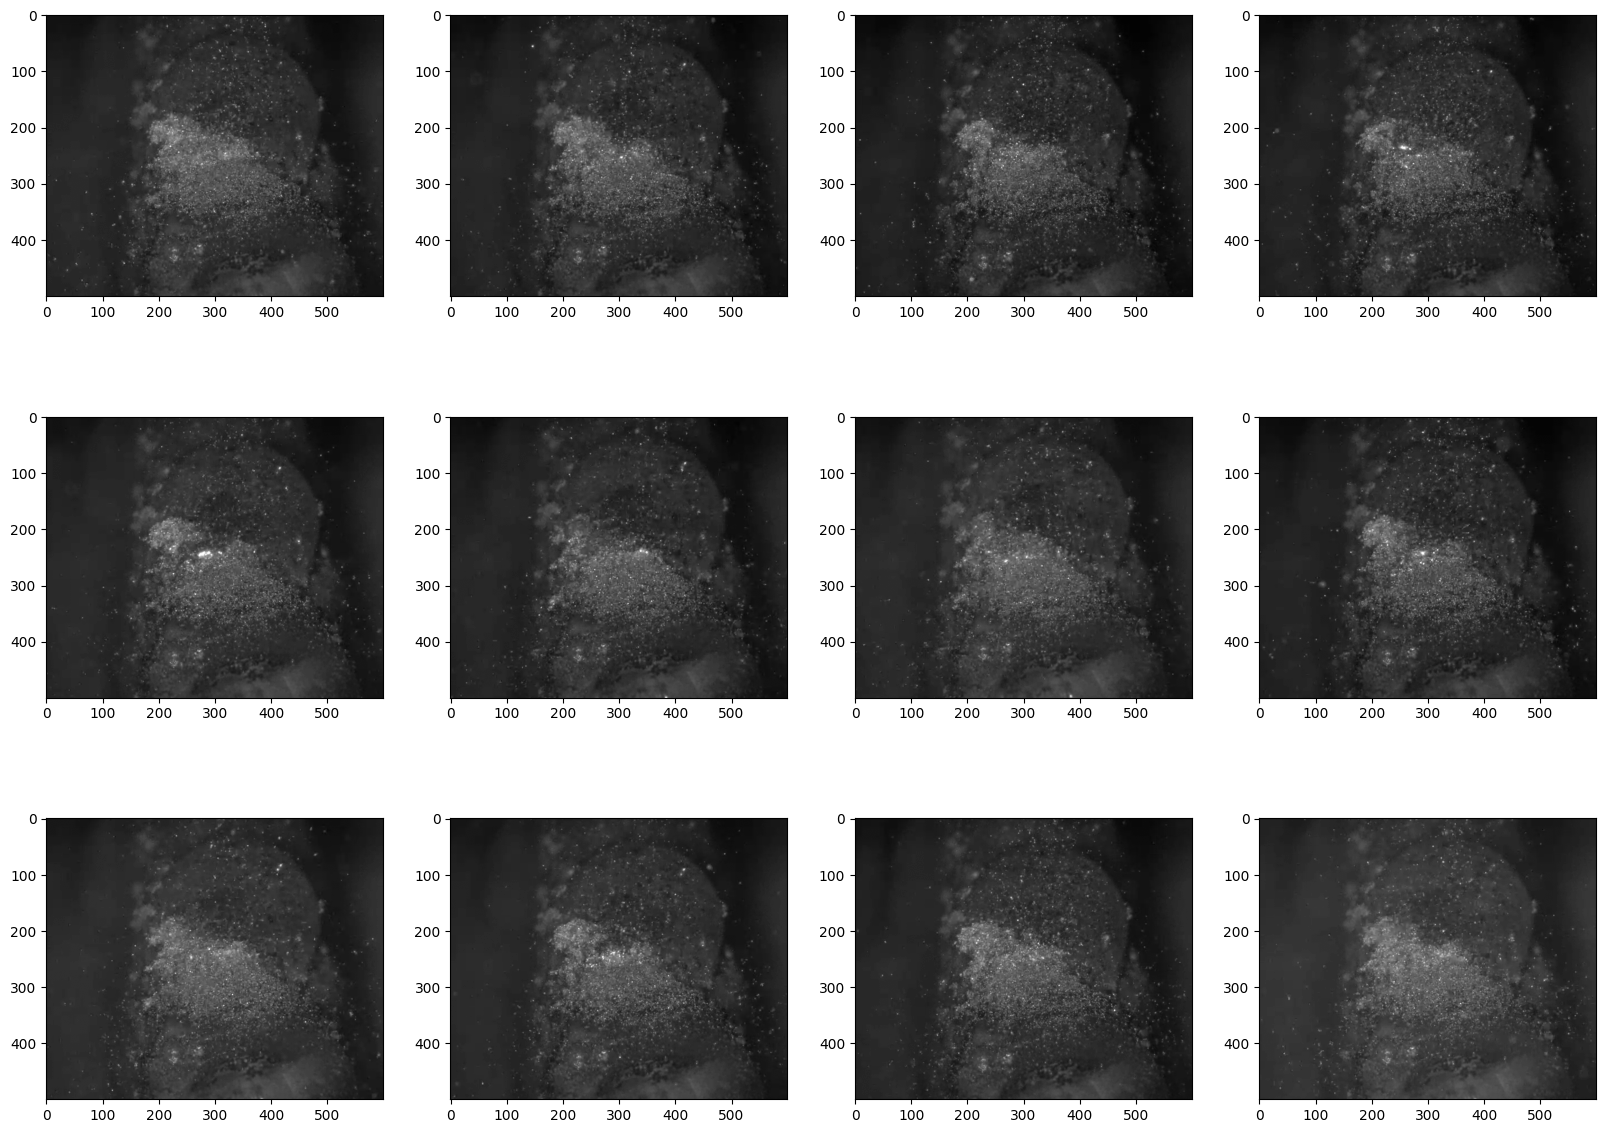

In [3]:
utils.visualize(imgs, "gray")

In [4]:
#detector = ced.cannyEdgeDetector(imgs, sigma=3, kernel_size=9, lowthreshold=0.05, highthreshold=0.22, weak_pixel=200)
#imgs_final = detector.detect()
#utils.visualize(imgs_final, 'gray')

In [4]:
detector = ced.cannyEdgeDetector(imgs, sigma=10, kernel_size=72, lowthreshold=0.08, highthreshold=0.20, weak_pixel=50)

In [5]:
imgs_final = detector.detect()

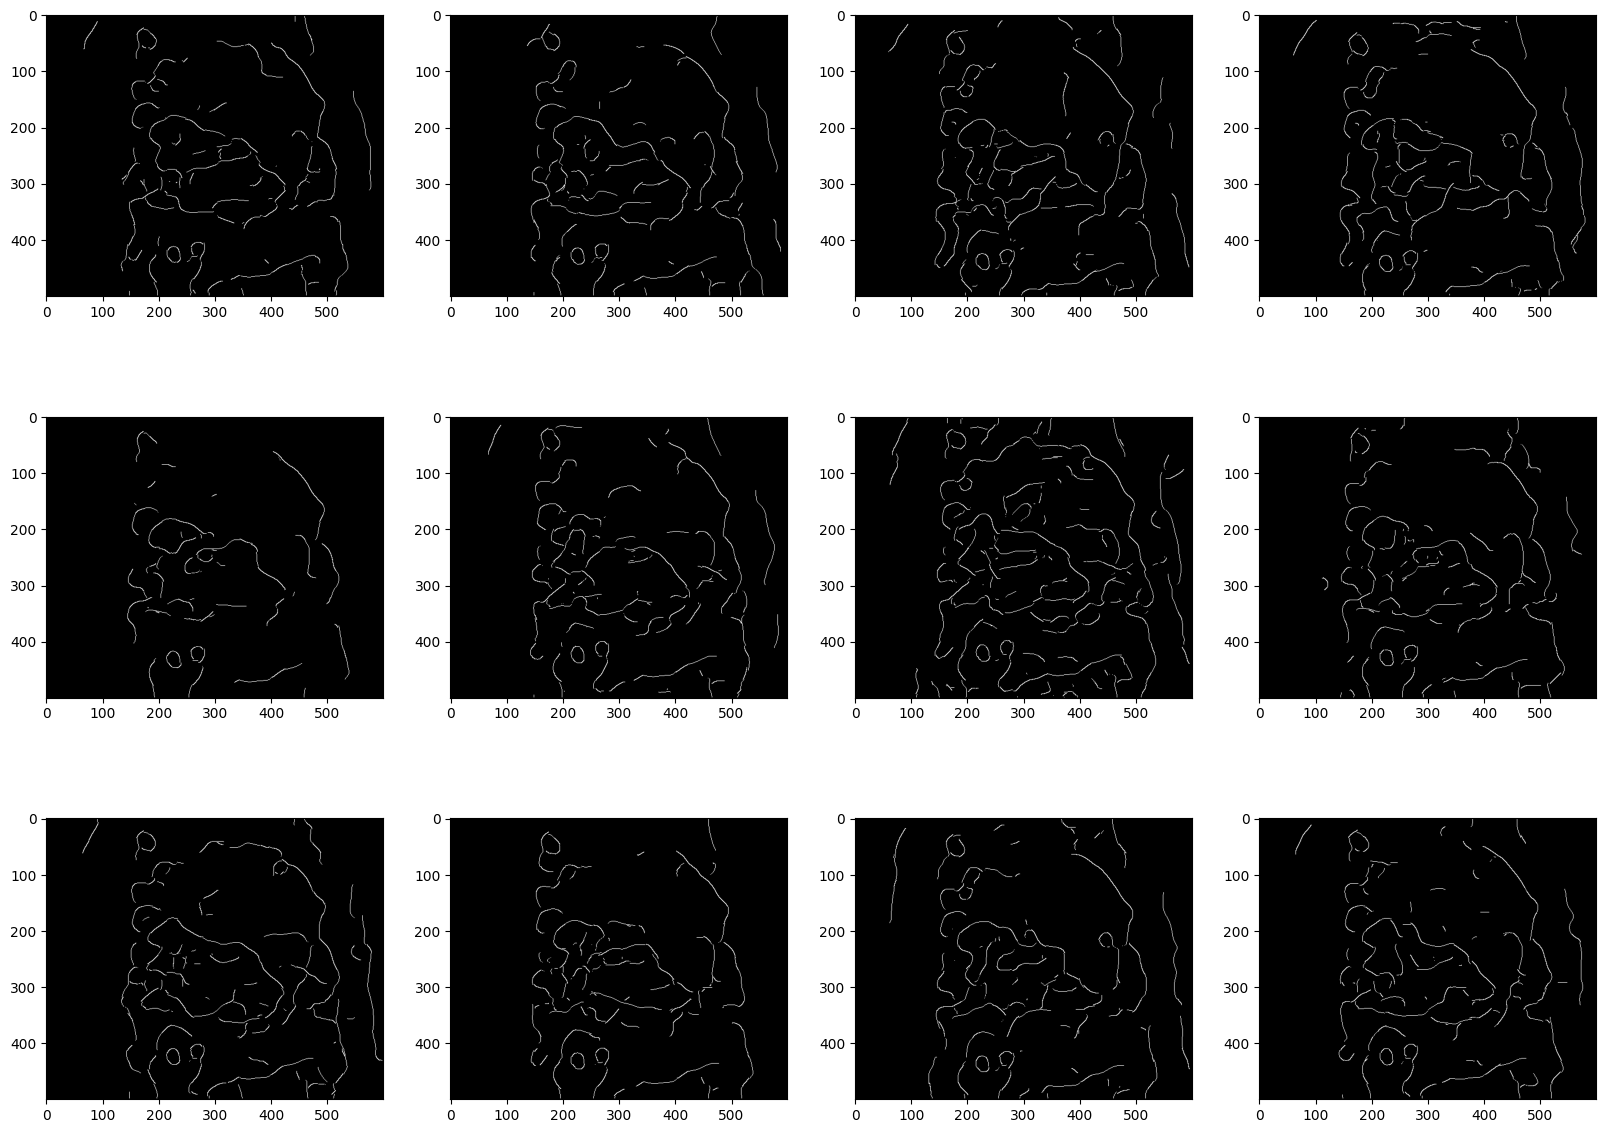

In [6]:
utils.visualize(imgs_final, 'gray')

In [7]:
im_test = Image.open("Images/Inputs/Set2/20240816-161944712534-0014.png")

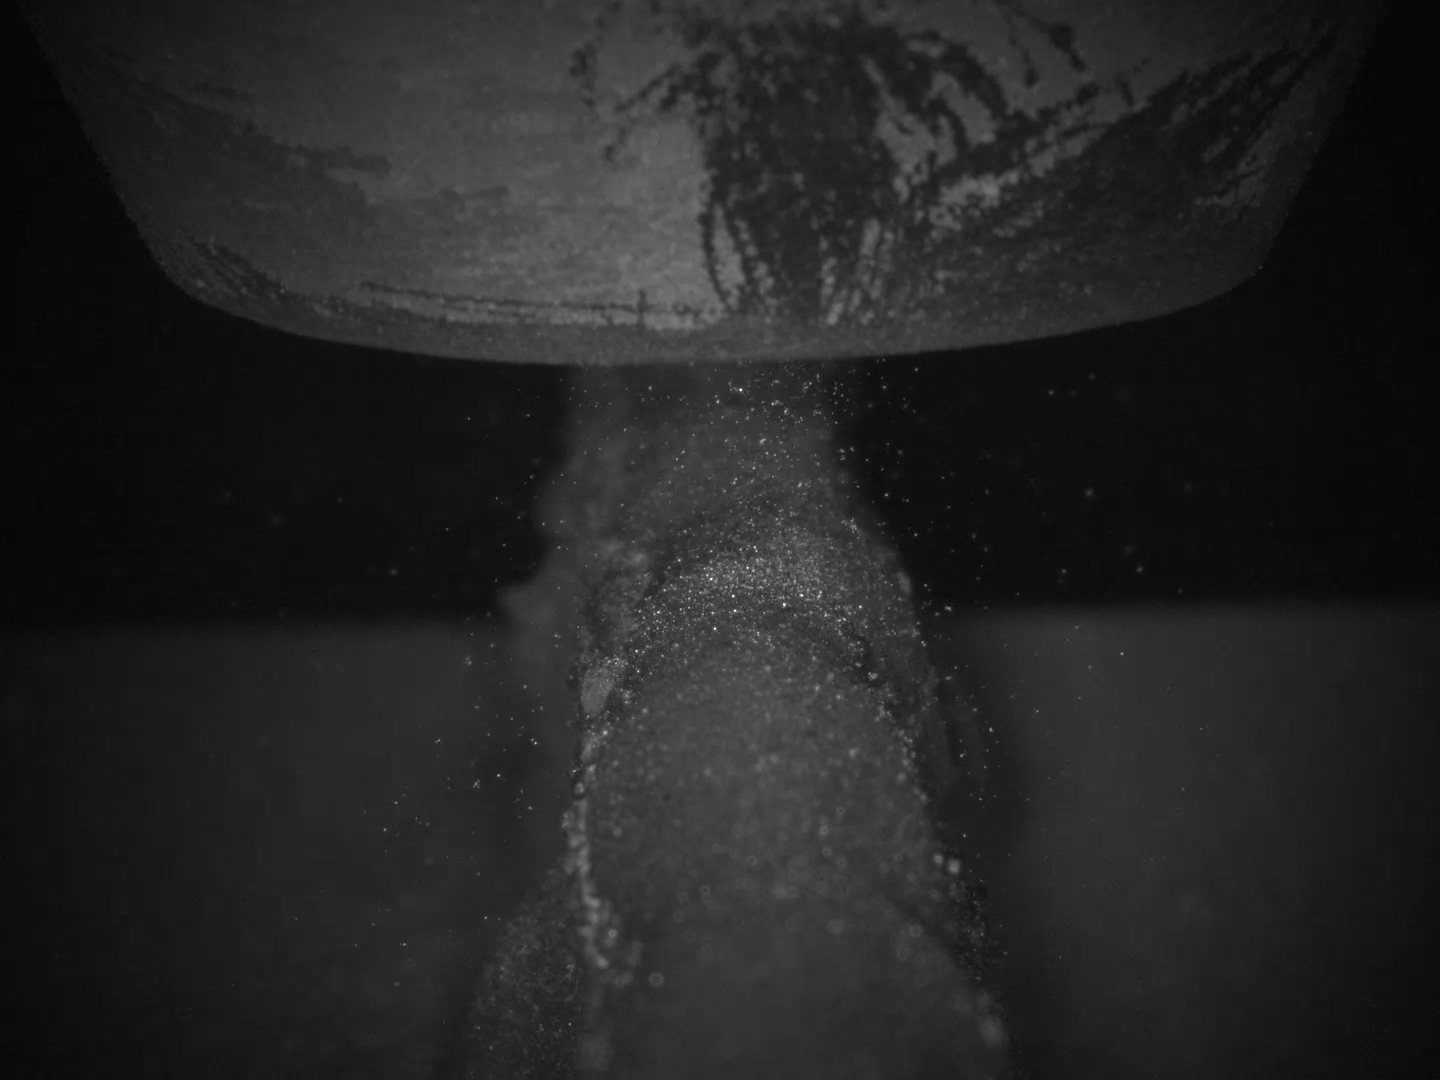

In [8]:
display(im_test)

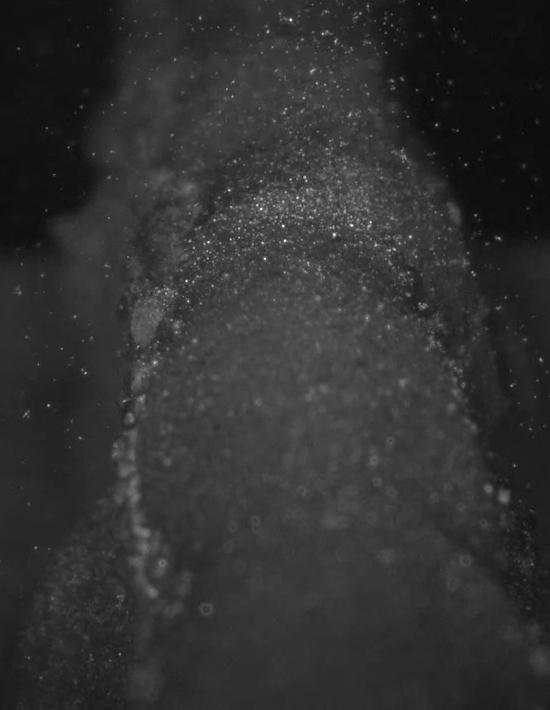

In [9]:
im_crop = im_test.crop((450,370,1000,1080)) #image was 1920x1080
display(im_crop)

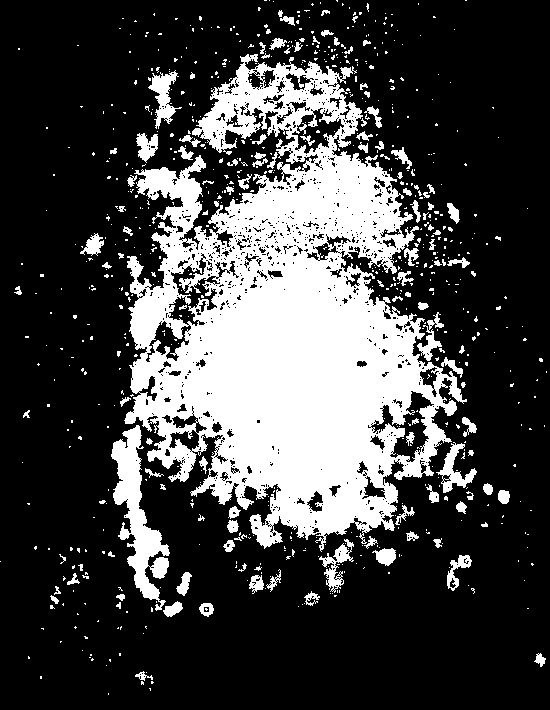

In [10]:
im_grey = im_crop.convert('L')
threshold = 60
im_thresh = im_grey.point(lambda p : 255 if p > threshold else 0)
display(im_thresh)

In [11]:
im_thresh.getpixel((0,0))

0

In [20]:
import cv2 as cv

In [26]:
%matplotlib auto

Using matplotlib backend: <object object at 0x10f3ab460>


## Using OpenCV for video

In [137]:
vid = cv.VideoCapture('Vids/VID_topview.webm')
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('output.mp4', fourcc, 30.0, (int(vid.get(3)), int(vid.get(4))), isColor=False)

if (vid.isOpened() == False):
    print("Error opening video stream or file")

while (vid.isOpened()):
    (ret, frame) = vid.read()
    if ret == True:
        #cv.imshow('Frame', frame)
        frame = cv.GaussianBlur(frame, (5, 5), 0)
        frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        edge = cv.Canny(frame, 50, 100)

        out.write(edge)
        cv.imshow('Edge Detection', edge)

    else:
        break


    if cv.waitKey(25) & 0xFF == ord('q'):
        break


vid.release()
out.release()

cv.waitKey(1)
cv.destroyAllWindows()
for i in range (1,5):
    cv.waitKey(1)

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [52]:
total_frames = vid.get(cv.CAP_PROP_FRAME_)
total_frames

0.0

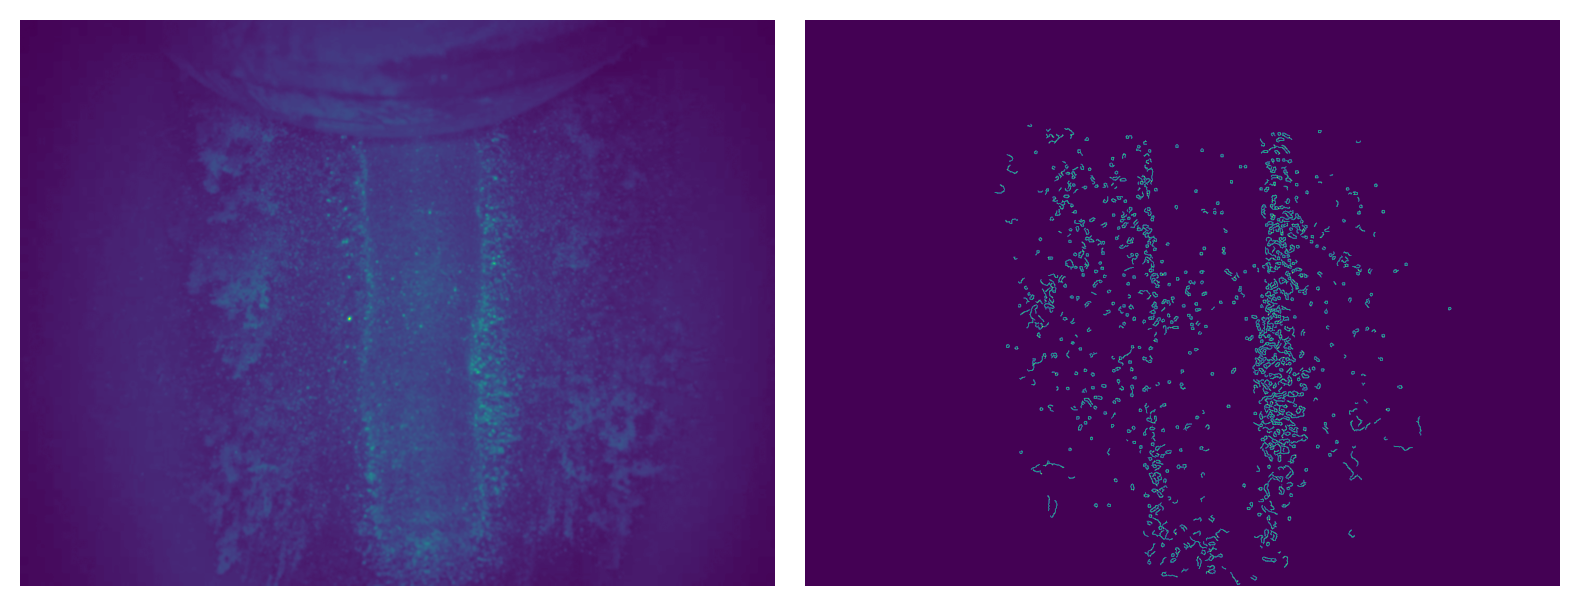

In [117]:
img = cv.imread('VID_topview-0001.png', cv.IMREAD_GRAYSCALE)
kernel = 5
sigma = 3
img_blur = cv.GaussianBlur(img, (kernel,kernel), sigma)
edge = cv.Canny(img_blur, 20, 40)
funcs.comparer_duo(img_blur, edge)


In [123]:
edge[400].shape

(1440,)

In [136]:
slice = edge[400].flatten
window = 5

In [ ]:
smoother = n

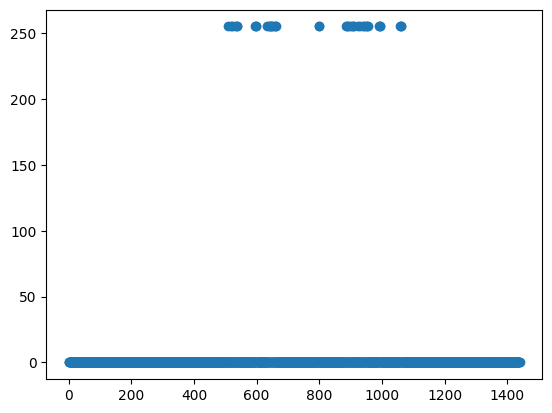

In [135]:
plt.scatter(x=np.arange(1440), y=edge[400].flatten())

In [133]:
plt.hist()

1440

In [134]:
np.arange(1400).size

1400